In [126]:
# 必要なライブラリのインクルード
import os
import re
import cv2
from PIL import Image as pilim
from PIL import ImageFilter
import matplotlib.pyplot as plt
import numpy as np
# opencv画像入力用
from IPython.display import display, Image
%matplotlib inline

In [151]:
def display_cv_image(image, format='.JPG'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))
def resizeAndShow(img,num):
    size = (4*num,4*num)
    show_img = cv2.resize(img, size)
    display_cv_image(show_img)

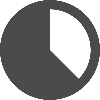

In [182]:
image =cv2.imread("./img/test/circle.jpeg")
img = image
resizeAndShow(img,25)

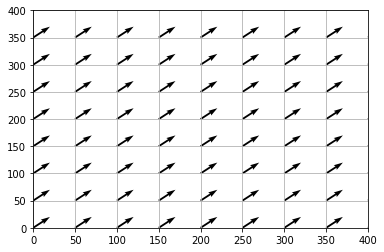

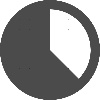

In [183]:
#画像のサイズを取得
width,height  = image.shape[0],image.shape[1]
displacement_field = np.zeros((width,height,2)) #変位場を求めるための格子変位場ベクトル配列
vector_field = np.zeros((width,height,2))  #変位場ベクトル配列
lattice = 50
x = 0
y = 0
while (x < width) :
    while(y<height):
        img[x][y] = 0
        y += lattice
    y = 0
    x += lattice

#変位ベクトルを計算している
x,y = 0,0
x_arr = []#始点のx座標配列
y_arr = []#始点のy座標配列
x_vec = []#ベクトルx成分
y_vec = []#ベクトルy成分
while (x < width) :
    while(y<height):
        displacement_field[x][y][0] = 20
        displacement_field[x][y][1] = 20
        x_arr.append(x)
        y_arr.append(y)
        x_vec.append(displacement_field[x][y][0])
        y_vec.append(displacement_field[x][y][1])
        y += lattice
    y = 0
    x += lattice
    
# 矢印（ベクトル）
plt.quiver(x_arr,y_arr,x_vec,y_vec,angles='xy',scale_units='xy',scale=1)

# グラフ表示
plt.xlim([0, 400])
plt.ylim([0,400])
plt.grid()
plt.draw()
plt.show()

resizeAndShow(img,25)

In [187]:
def B(num,s):
    if num == 0:
        return (1-s)**3/6
    elif num == 1:
        return (3*s**3-6*s**2+4)/6
    elif num == 2:
        return (-3*s**3+3*s**2+3*s+1)/6
    elif num == 3:
        return s**3/6
    else:
        return 0

delta = lattice

def myu(x,y,delta):
    i = abs(int(x/delta))-1
    j = abs(int(y/delta))-1
    u = int(x/delta) - abs(int(x/delta))
    v = int(y/delta) - abs(int(y/delta))
    
    x_value = 0
    y_value = 0
    for m in range(0,4):
        for n in range(0,4):
            x_value += B(m,u)*B(n,v)*displacement_field[i+m][j+n][0]
            y_value += B(m,u)*B(n,v)*displacement_field[i+m][j+n][1]
    return x_value,y_value



In [ ]:
x_arr = []#始点のx座標配列
y_arr = []#始点のy座標配列
x_vec = []#ベクトルx成分
y_vec = []#ベクトルy成分

x,y = 0,0
while (x < width) :
    while(y<height):
        if y % lattice != 0 :
            vector_field[x][y][0], vector_field[x][y][1] = myu(x,y,delta)
        else:
            vector_field[x][y][0], vector_field[x][y][1] = displacement_field[x][y][0], displacement_field[x][y][1]
            
        x_arr.append(x)
        y_arr.append(y)
        x_vec.append(vector_field[x][y][0])
        y_vec.append(vector_field[x][y][1])
        y += 1
    y = 0
    x += 1
    



In [ ]:
# 矢印（ベクトル）
plt.quiver(x_arr,y_arr,x_vec,y_vec,angles='xy',scale_units='xy',scale=1)

# グラフ表示
plt.xlim([0, 400])
plt.ylim([0,400])
plt.grid()
plt.draw()
plt.show()